In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'C:\Users\KIIT_Intern\Desktop\Ml_1st year\Loan Dataset\credit_train_ori.csv')

In [3]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
data.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [6]:
# dropped all rows which are totally null
data.dropna(axis=0,how='all',inplace=True)

In [7]:
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [8]:
# now we see that in our annual income we are having null values so inorder to fill that we  i am taking the median of the
# salary w.r.t to each each year of experience in there currernt job for ex if a person is having 2 years of experience 
# then the median if that particular salary is assigned to nan values
y = data.groupby('Years in current job').agg({'Annual Income':'median'})

In [9]:
y.reset_index(inplace=True)

In [10]:
y

,Years in current job,Annual Income
0,1 year,1057445.00
1,10+ years,1322020.00
2,2 years,1119822.00
3,3 years,1129854.00
4,4 years,1134670.50
5,5 years,1151970.00
6,6 years,1145434.00
7,7 years,1189761.00
8,8 years,1209692.00
9,9 years,1222536.00


In [11]:
for i in y['Years in current job'].unique():
    z = list(y[y['Years in current job']==i]['Annual Income'])[0]
    data.loc[(data['Years in current job'] == i) & (data['Annual Income'].isnull()), 'Annual Income'] = z

In [12]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,nan,1322020.00,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,nan,1151970.00,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00


In [13]:
data.loc[(data['Years in current job'].isnull()), 'Years in current job'] = 'Others'

In [14]:
data.loc[(data['Years in current job']=='Others'),:].head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
29,dcf093ca-d26b-4853-9679-aa0c7ebe05a7,5129cffc-68a1-4dd9-8bfe-035f3478d6dd,Fully Paid,107404.00,Short Term,nan,nan,Others,Home Mortgage,other,19238.07,43.70,nan,5.00,0.00,28956.00,58014.00,0.00,0.00
73,fd50c3d1-8d6d-410e-ba58-d3f1bcae6409,a17de546-6b7f-4abf-9af4-99047eeda08a,Fully Paid,311058.00,Long Term,675.00,1343167.00,Others,Home Mortgage,Debt Consolidation,21378.80,31.40,17.00,11.00,0.00,247912.00,541596.00,0.00,0.00
84,37b7adb4-8f90-4ddf-813c-813e34dda68a,034ce7a6-999c-4ffa-a1d2-610f88a29606,Fully Paid,262988.00,Short Term,743.00,1340279.00,Others,Rent,Debt Consolidation,9348.38,28.20,35.00,9.00,0.00,499548.00,681296.00,0.00,0.00
96,4cfa482a-57c2-4856-ab26-a8af32adaa3f,403bdb3c-e326-4172-9f81-4e6b992cc349,Fully Paid,158818.00,Short Term,731.00,315666.00,Others,Own Home,Debt Consolidation,8522.83,31.30,60.00,13.00,2.00,260072.00,756646.00,0.00,2.00
169,f002c1ad-994f-41bd-88ae-e2d68cb9878d,47fdd7c4-e629-4826-a847-d2438cf2f445,Fully Paid,64966.00,Short Term,723.00,1224968.00,Others,Home Mortgage,other,23172.21,44.00,48.00,16.00,0.00,858154.00,1344574.00,0.00,0.00


In [15]:
z = pd.DataFrame(data[data['Years in current job']=='Others']['Annual Income'])
z.sort_values(by='Annual Income',inplace=True)
z = z[~pd.isnull(z['Annual Income'])]
y = z['Annual Income'].median()

In [16]:
data.loc[(data['Years in current job']=='Others') & (data['Annual Income'].isnull()), 'Annual Income'] = y

In [17]:
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                       0
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

# Distribution Graphs

In [18]:
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                       0
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
import plotly.figure_factory as ff
import seaborn as sns

In [20]:
def find_skewed_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

# Numerical Columns
## Current Loan amount

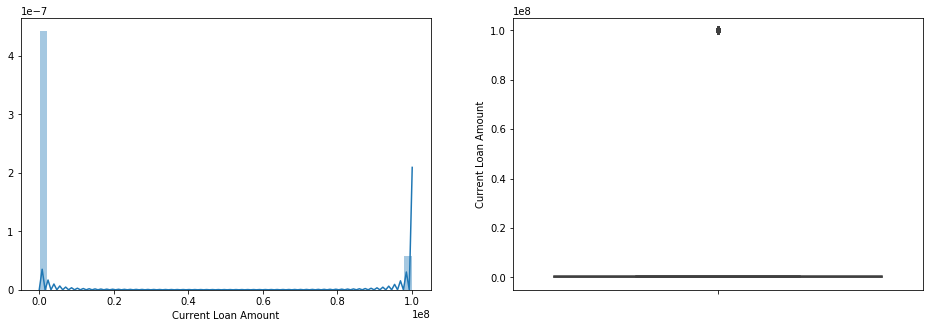

In [21]:
plt.figure(figsize=(25,5))

plt.subplot(1, 3, 1)
sns.distplot(data['Current Loan Amount'])

plt.subplot(1, 3, 2)
sns.boxplot(y=data['Current Loan Amount'])

#####  here we can see that due to the outliers present the graph is not showing a perfect distribution which means that in the column current loan amount there must be some values that are too large .The similar can be seen on the box plot

In [73]:
data['Current Loan Amount'].max()

99999999.0

In [74]:
# as we can see that the loan amount is too large and can never be given by the to a particurlar bank to a individual so it is reasonable
# to remove that value and again plot the graph
df= data.loc[(data['Current Loan Amount']!=99999999.0),:]

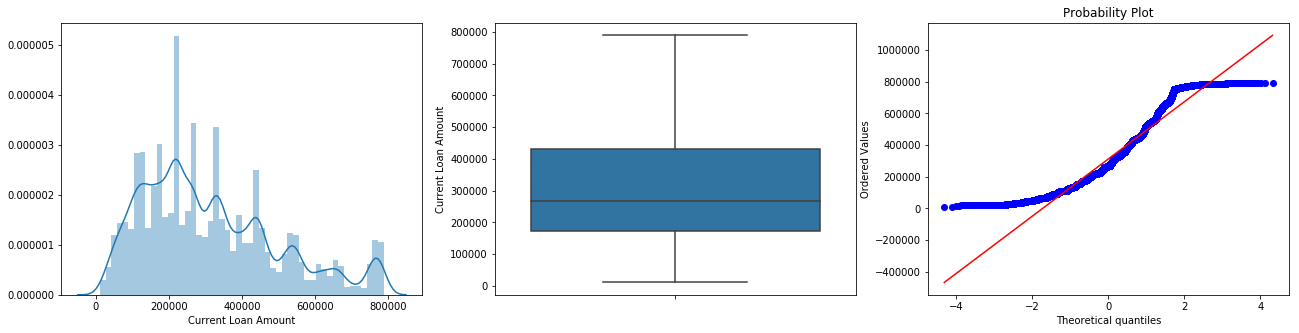

In [75]:
plt.figure(figsize=(22, 5))

plt.subplot(1, 3, 1)
sns.distplot(df['Current Loan Amount'])

plt.subplot(1, 3, 2)
sns.boxplot(y =df['Current Loan Amount'])

plt.subplot(1, 3, 3)
stats.probplot(df['Current Loan Amount'],dist="norm",plot=pylab)

plt.show()

###### As we can see from the graph it somewhat towards +ve Skew graph which means that there are less no of individuals which take higher loan amount 

In [76]:
upper_boundary,lower_boundary  = find_skewed_boundaries(data, 'Current Loan Amount', 1.5)
print('Upper Boundary is ' + str(upper_boundary))
print('Lower Boundary is ' + str(lower_boundary))
print('total no of customers : {}'.format(len(data)))

print('customers loan ammount bigger than  1042877.0: {}'.format(
        len(data[data['Current Loan Amount'] > upper_boundary])))
print()
print('% customers loan ammount bigger than  1042877.0: {}'.format(
        len(data[data['Current Loan Amount'] > upper_boundary]) / len(data)))

Upper Boundary is 1042877.0
Lower Boundary is -338283.0
total no of customers : 100000
customers loan ammount bigger than  1042877.0: 11484

% customers loan ammount bigger than  1042877.0: 0.11484


as the loan amount can never be negative so we would ignore that and as we upper boundary is 1042877 which means that if any loan amount beyond this is considered as outlier and total percantge of customer having beyond this is 11.48%

In [77]:
df['Current_Loan_Amount'] = df['Current Loan Amount']**(1/5)

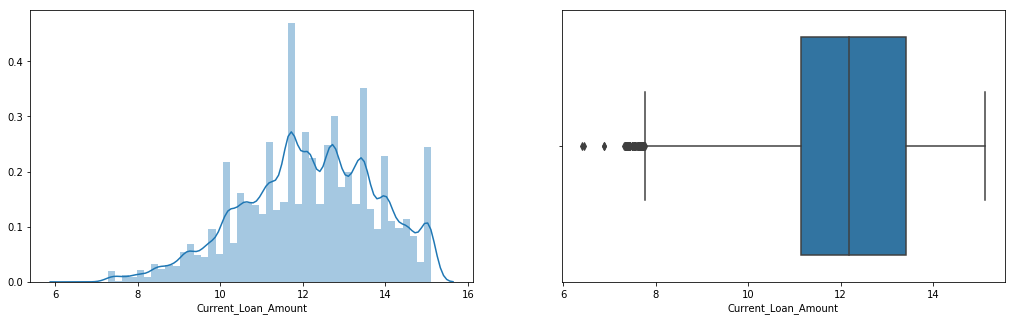

In [78]:
plt.figure(figsize=(27, 5))

plt.subplot(1,3,1)
sns.distplot(df['Current_Loan_Amount'])

plt.subplot(1,3,2)
sns.boxplot(df['Current_Loan_Amount'])
plt.show()

This graph is the Exponential transformation of the current loan amout graph present above

## Annual Income

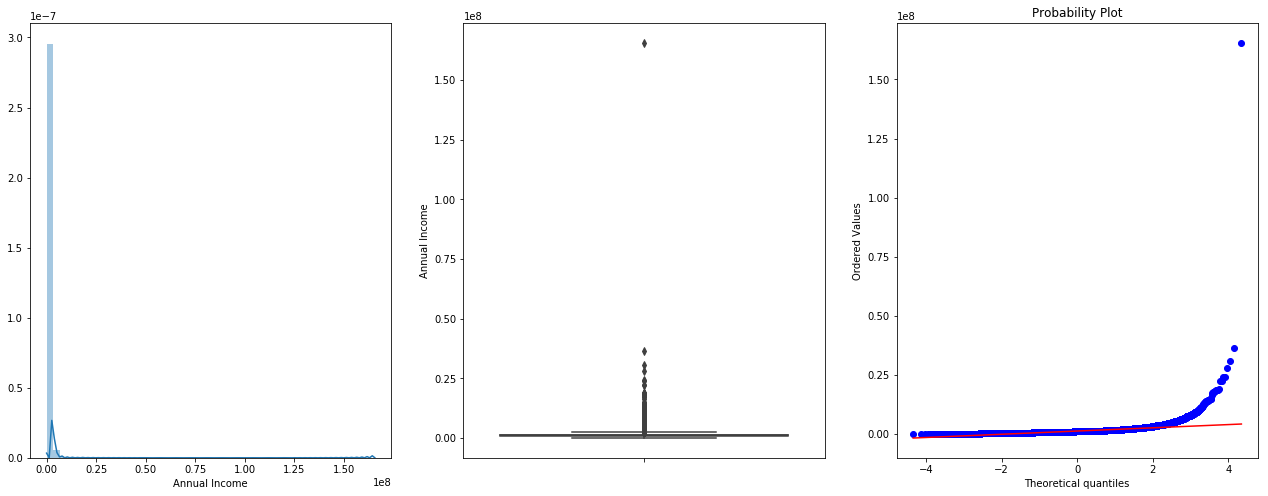

In [79]:
plt.figure(figsize=(22, 8))

plt.subplot(1, 3, 1)
sns.distplot(data['Annual Income'])

plt.subplot(1, 3, 2)
sns.boxplot(y=data['Annual Income'])

plt.subplot(1, 3, 3)
stats.probplot(data['Annual Income'],dist="norm",plot=pylab)

plt.show()

In [80]:
upper_boundary,lower_boundary  = find_skewed_boundaries(data, 'Annual Income', 3)
print('Upper Boundary is ' + str(upper_boundary))
print('Lower Boundary is ' + str(lower_boundary))
print('Total no of customers : {}'.format(len(data)))

print('Total no of customers Annual Income bigger than ' + str(upper_boundary) + ' : {}'.format(
        len(data[data['Annual Income'] > upper_boundary])))
print()
print('% customers Annual Income bigger than ' + str(upper_boundary) +' : {}'.format(
        len(data[data['Annual Income'] > upper_boundary]) / len(data)))

Upper Boundary is 3296747.0
Lower Boundary is -866020.0
Total no of customers : 100000
Total no of customers Annual Income bigger than 3296747.0 : 2376

% customers Annual Income bigger than 3296747.0 : 0.02376


In [81]:
data['Annual_Income'] = data['Annual Income']**(1/5)

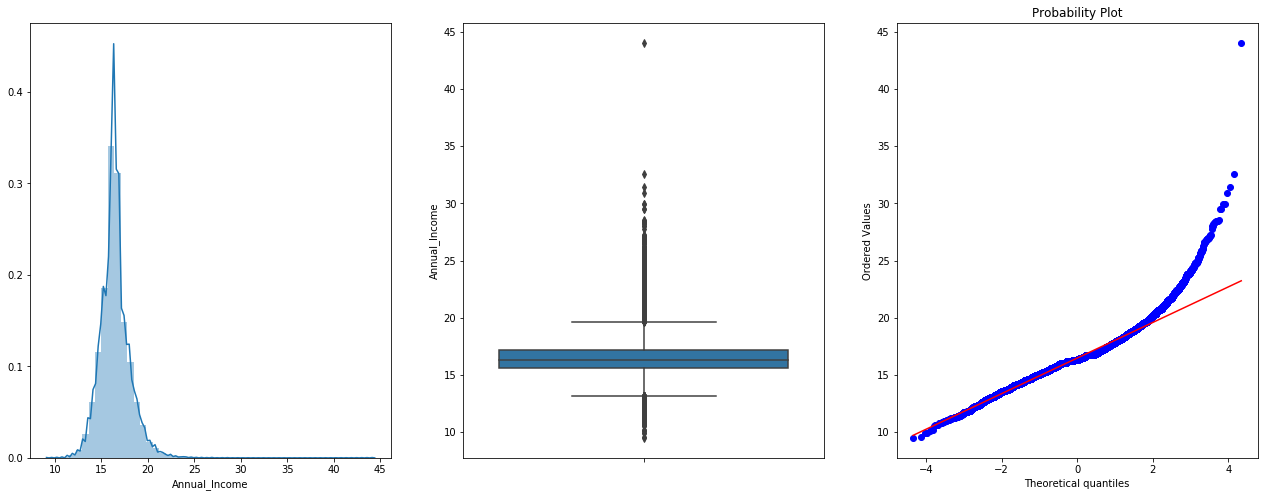

In [82]:
plt.figure(figsize=(22, 8))

plt.subplot(1, 3, 1)
sns.distplot(data['Annual_Income'])

plt.subplot(1, 3, 2)
sns.boxplot(y=data['Annual_Income'])

plt.subplot(1, 3, 3)
stats.probplot(data['Annual_Income'],dist="norm",plot=pylab)

plt.show()

Annual Income distribution graphs is not normally distribuited and it is +ve skewed,from the boxplot also we could see that there many variables present to the right which gives us the insight that less no of our customers are having higher income

## Monthly Debt

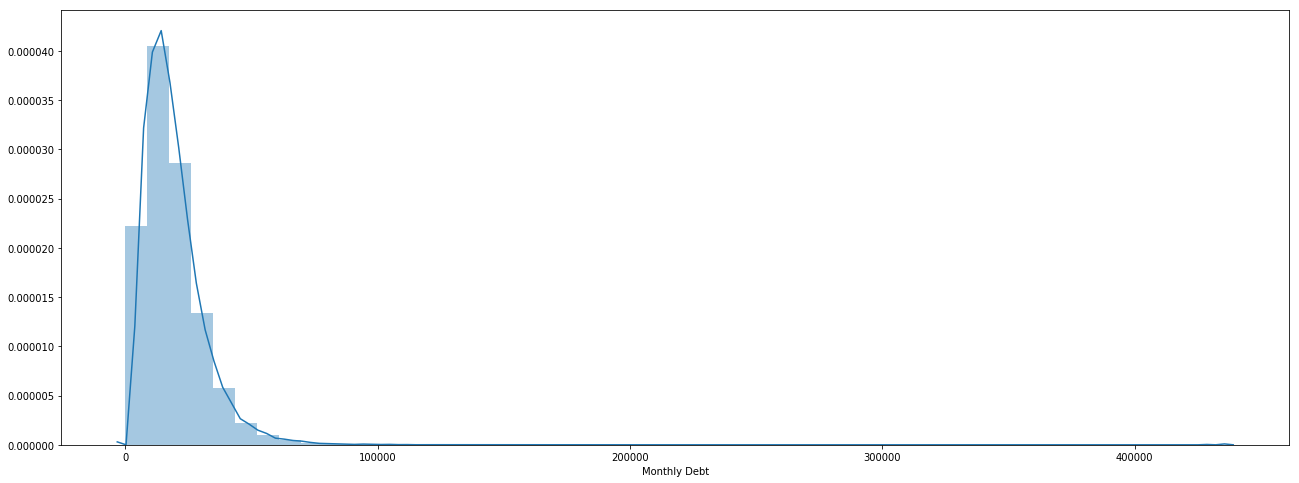

In [83]:
plt.figure(figsize=(22, 8))

sns.distplot(data['Monthly Debt'])
plt.show()

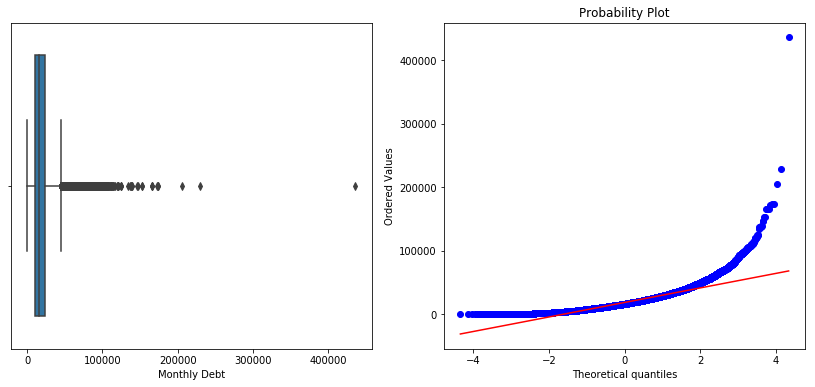

In [84]:
plt.figure(figsize=(22, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data['Monthly Debt'])

plt.subplot(1, 3, 2)
stats.probplot(data['Monthly Debt'],dist="norm",plot=pylab)

plt.show()

In [85]:
upper_boundary,lower_boundary  = find_skewed_boundaries(data, 'Monthly Debt', 1.5)
print('Upper Boundary is ' + str(upper_boundary))
print('Lower Boundary is ' + str(lower_boundary))
print('Total no of customers : {}'.format(len(data)))

print('Total no of customers Monthly Debt bigger than ' + str(upper_boundary) + ' : {}'.format(
        len(data[data['Monthly Debt'] > upper_boundary])))
print()
print('% customers Monthly Debt bigger than ' + str(upper_boundary) +' : {}'.format((
        len(data[data['Monthly Debt'] > upper_boundary]) / len(data))))

Upper Boundary is 44708.899999999994
Lower Boundary is -10482.68
Total no of customers : 100000
Total no of customers Monthly Debt bigger than 44708.899999999994 : 3362

% customers Monthly Debt bigger than 44708.899999999994 : 0.03362


out of our Total customers only 3.3% of them have a higher monthly debt than the average monthly debt payed by others

In [86]:
data['Monthly_Debt'] = data['Monthly Debt']**(1/5)

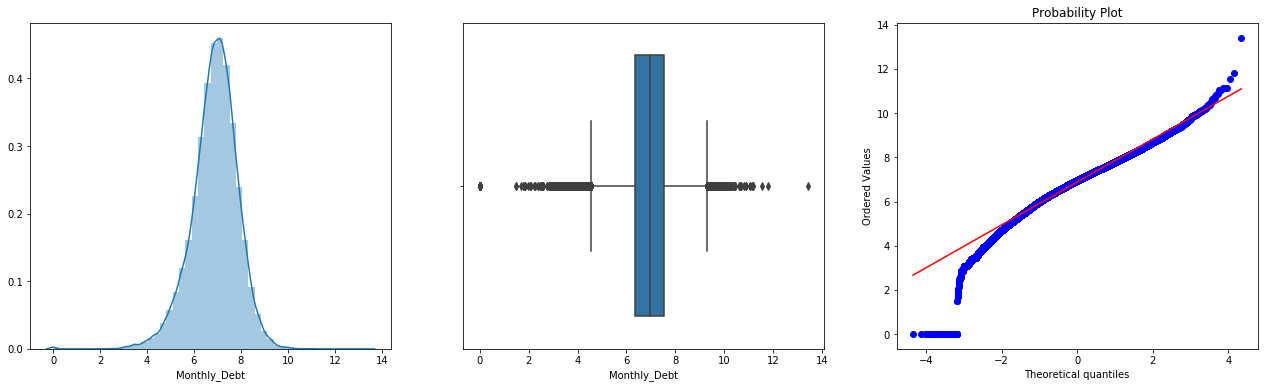

In [87]:
plt.figure(figsize=(22, 6))

plt.subplot(1, 3, 1)
sns.distplot(data['Monthly_Debt'])

plt.subplot(1, 3, 2)
sns.boxplot(data['Monthly_Debt'])

plt.subplot(1, 3, 3)
stats.probplot(data['Monthly_Debt'],dist="norm",plot=pylab)

plt.show()

## Years of  Credit History

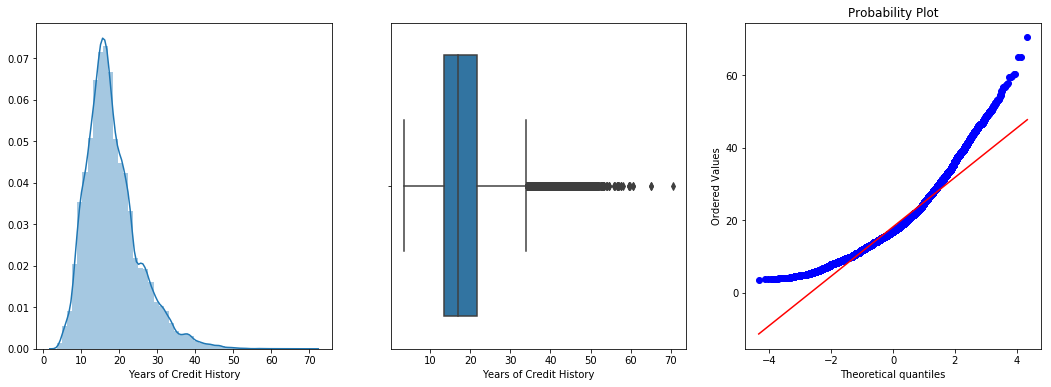

In [88]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.distplot(data['Years of Credit History'])

plt.subplot(1,3,2)
sns.boxplot(data['Years of Credit History'])

plt.subplot(1,3,3)
stats.probplot(data['Years of Credit History'],dist="norm",plot=pylab)

plt.show()

In this graph also we can see that it is Right skewed which means that most of our customers have a credit history lying betweeen 10-30 years only a few of our customers having a credit history greater than 40 years

In [89]:
upper_boundary,lower_boundary  = find_skewed_boundaries(data, 'Years of Credit History', 1.5)
print('Upper Boundary is ' + str(upper_boundary))
print('Lower Boundary is ' + str(lower_boundary))
print('Total no of customers : {}'.format(len(data)))

print('Total no of customers having there Credit History bigger than ' + str(upper_boundary) + ' : {}'.format(
        len(data[data['Years of Credit History'] > upper_boundary])))
print()
print('% customers having there Credit History bigger than ' + str(upper_boundary) +' : {}'.format((
        len(data[data['Years of Credit History'] > upper_boundary]) / len(data))))
print()
print('Total no of customers having there Credit History lower than ' + str(int(lower_boundary)) + ' : {}'.format(
        len(data[data['Years of Credit History'] < lower_boundary])))
print()
print('% customers having there Credit History lower than ' + str(int(lower_boundary)) +' : {}'.format((
        len(data[data['Years of Credit History'] < lower_boundary]) / len(data))))

Upper Boundary is 34.0
Lower Boundary is 1.200000000000001
Total no of customers : 100000
Total no of customers having there Credit History bigger than 34.0 : 3089

% customers having there Credit History bigger than 34.0 : 0.03089

Total no of customers having there Credit History lower than 1 : 0

% customers having there Credit History lower than 1 : 0.0


In [90]:
data['Years_of_Credit_History'] = data['Years of Credit History']**(1/5)

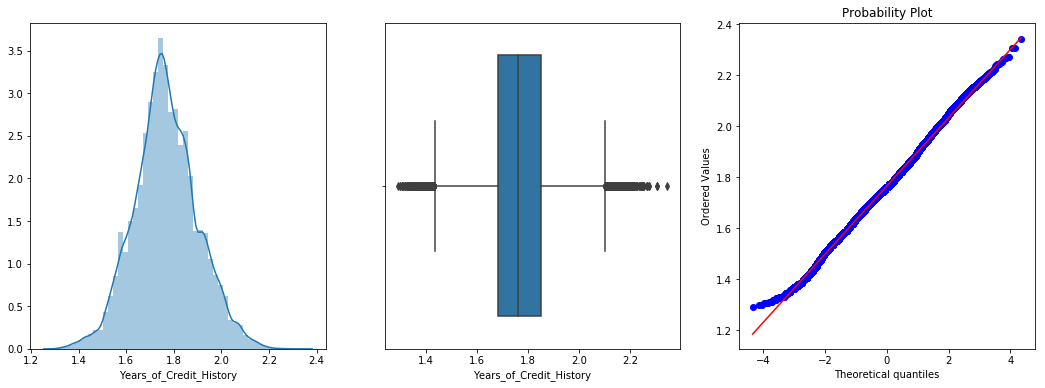

In [91]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.distplot(data['Years_of_Credit_History'])

plt.subplot(1,3,2)
sns.boxplot(data['Years_of_Credit_History'])

plt.subplot(1,3,3)
stats.probplot(data['Years_of_Credit_History'],dist="norm",plot=pylab)

plt.show()

This graph is exponential transformation of the right skewed which shows a perfect normal distribution of the graph

## Number of Open Accounts 

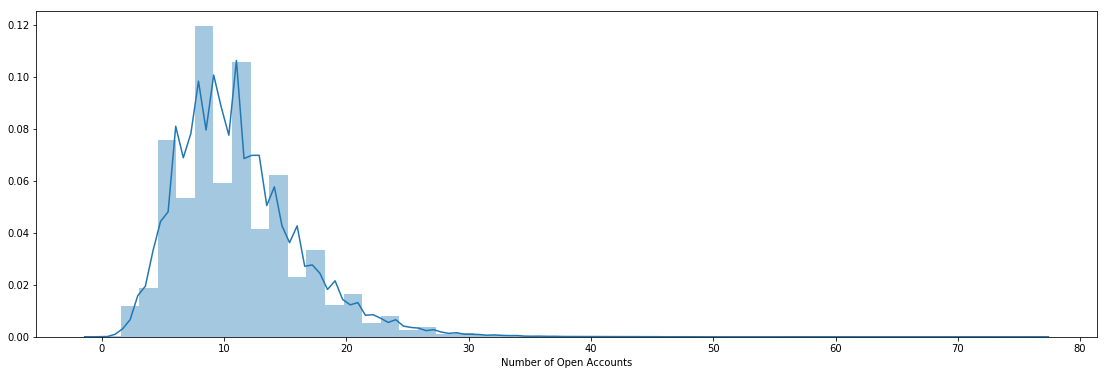

In [92]:
plt.figure(figsize=(19,6))

sns.distplot(data['Number of Open Accounts'])

plt.show()

 This is also a right skewed graph where we can see that most of our customer who took loan were having aleast 5-15 open accounts  and there are very few customer who are more than 20 open accounts

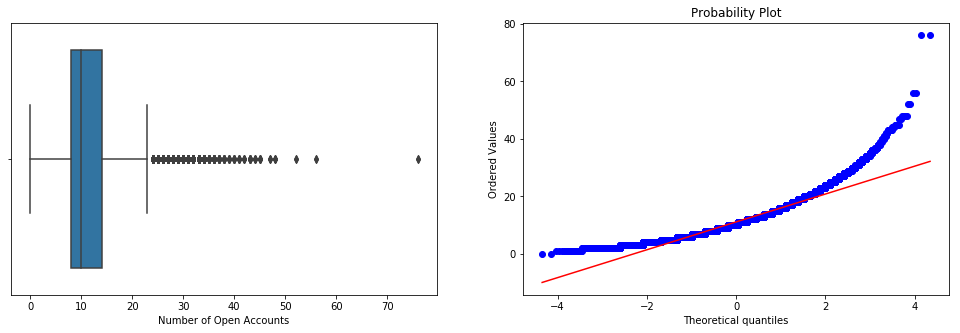

In [93]:
plt.figure(figsize=(26,5))

plt.subplot(1,3,1)
sns.boxplot(data['Number of Open Accounts'])

plt.subplot(1,3,2)
stats.probplot(data['Number of Open Accounts'],dist="norm",plot=pylab)

plt.show()

The same can be seen on the boxplot as well 

In [94]:
upper_boundary,lower_boundary  = find_skewed_boundaries(data, 'Number of Open Accounts', 1.5)
print('Upper Boundary is ' + str(upper_boundary))
print('Lower Boundary is ' + str(lower_boundary))
print('Total no of customers : {}'.format(len(data)))

print('Total no of customers with Number of Open Accounts bigger than ' + str(int(upper_boundary)) + ' : {}'.format(
        len(data[data['Number of Open Accounts'] > upper_boundary])))
print()
print('% customers with Number of Open Accounts bigger than ' + str(int(upper_boundary)) +' : {}'.format((
        len(data[data['Number of Open Accounts'] > upper_boundary]) / len(data))))

Upper Boundary is 23.0
Lower Boundary is -1.0
Total no of customers : 100000
Total no of customers with Number of Open Accounts bigger than 23 : 2283

% customers with Number of Open Accounts bigger than 23 : 0.02283


In [95]:
data['Number_of_Open_Accounts'] = data['Number of Open Accounts']**(1/2)

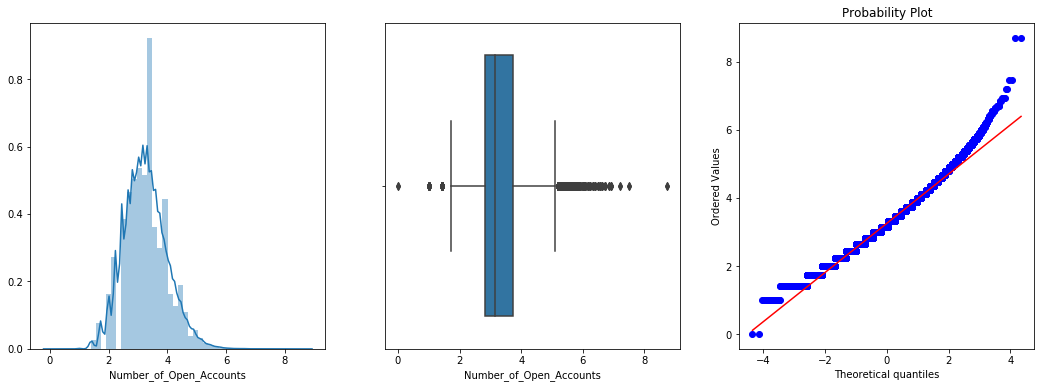

In [96]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.distplot(data['Number_of_Open_Accounts'])

plt.subplot(1,3,2)
sns.boxplot(data['Number_of_Open_Accounts'])

plt.subplot(1,3,3)
stats.probplot(data['Number_of_Open_Accounts'],dist="norm",plot=pylab)

plt.show()

This is the square root tranformation of the graph which now show somewhat perfectly distribution graph

## Number of Credit Problems

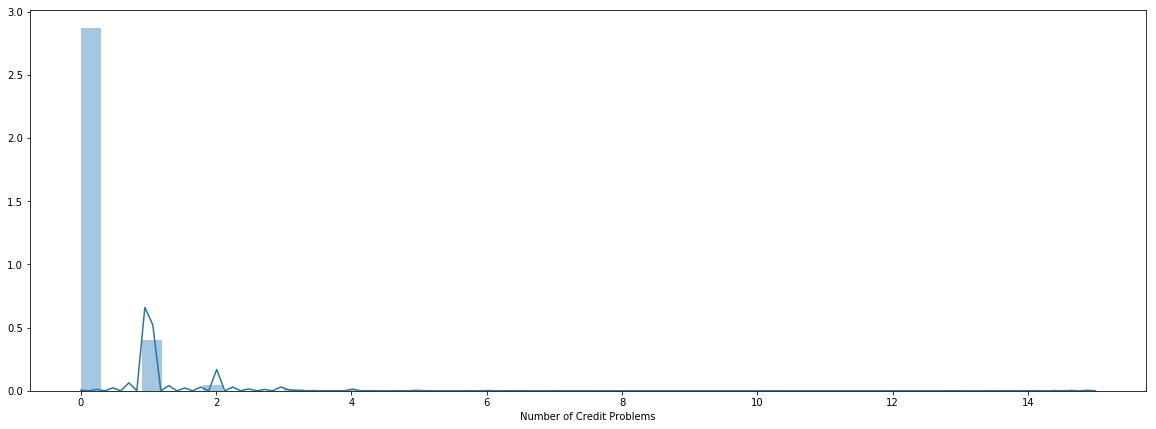

In [97]:
plt.figure(figsize=(20,7))

sns.distplot(data['Number of Credit Problems'])

plt.show()

Majority of our customers dosen't seem to have any Credit problem and only 12 percent approx out of total customer have faced credit problems only once and only 1.8 percent of our customer have face credit problems mor than once and  also from the graphs we can also conclude that outliers not present because there could be no person having more than 100 credit problems 
and even if thats the case then there must be some fault in the banks system

In [98]:
data.groupby('Number of Credit Problems').agg({'Customer ID':'count'})

,Customer ID
Number of Credit Problems,
0.00,86035
1.00,12077
2.00,1299
3.00,378
4.00,125
5.00,49
6.00,17
7.00,8
8.00,4


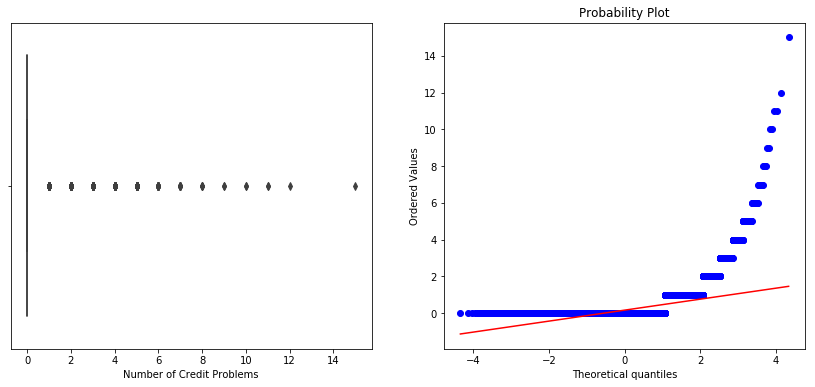

In [99]:
plt.figure(figsize=(22,6))
plt.subplot(1,3,2)
sns.boxplot(data['Number of Credit Problems'])

plt.subplot(1,3,3)
stats.probplot(data['Number of Credit Problems'],dist="norm",plot=pylab)

plt.show()

In [100]:
#data['Number_of_Credit_Problems'] = data['Number of Credit Problems']**(1/5)

In [101]:
# plt.figure(figsize=(18,6))

# plt.subplot(1,3,1)
# sns.distplot(data['Number_of_Credit_Problems'])

# plt.subplot(1,3,2)
# sns.boxplot(data['Number_of_Credit_Problems'])

# plt.subplot(1,3,3)
# stats.probplot(data['Number_of_Credit_Problems'],dist="norm",plot=pylab)

# plt.show()

## Current Credit Balance 

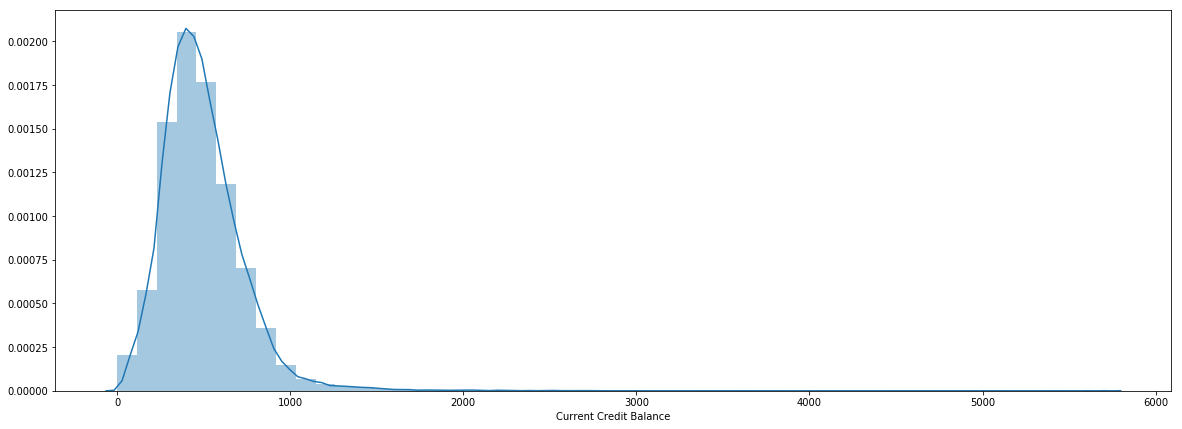

In [102]:
plt.figure(figsize=(20,7))

sns.distplot(data['Current Credit Balance']**(1/2))
plt.show()

As we can see that the graph is right skewed and majority of our customers who toook have credit balance less than 10000 and there are only few of our cutomers have credit balance greater than 10000

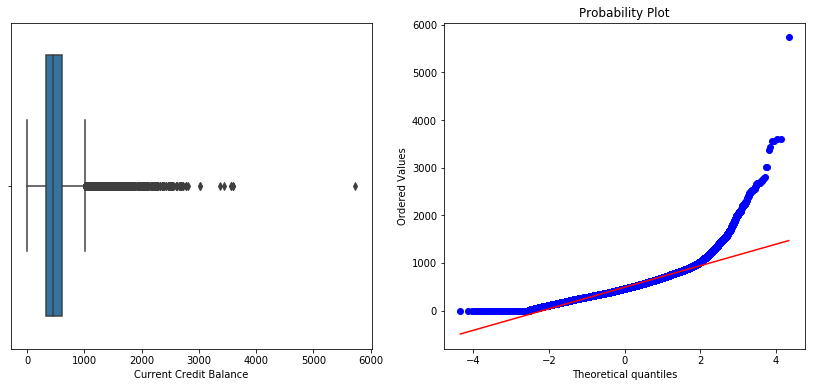

In [103]:
plt.figure(figsize=(22,6))
plt.subplot(1,3,2)
sns.boxplot(data['Current Credit Balance']**(1/2))

plt.subplot(1,3,3)
stats.probplot(data['Current Credit Balance']**(1/2),dist="norm",plot=pylab)

plt.show()

In [104]:
upper_boundary,lower_boundary  = find_skewed_boundaries(data, 'Current Credit Balance', 3)
print('Upper Boundary is ' + str(upper_boundary))
print()
print('Lower Boundary is ' + str(lower_boundary))
print()
print('Total no of customers : {}'.format(len(data)))
print()
print('Total no of customers with Current Credit Balance bigger than ' + str(int(upper_boundary)) + ' : {}'.format(
        len(data[data['Current Credit Balance'] > upper_boundary])))
print()
print('% customers with Current Credit Balance bigger than ' + str(int(upper_boundary)) +' : {}'.format((
        len(data[data['Current Credit Balance'] > upper_boundary]) / len(data))))
print()
print('Total no of customers with Current Credit Balance lower than ' + str(int(lower_boundary)) + ' : {}'.format(
        len(data[data['Current Credit Balance'] < lower_boundary])))
print()
print('% customers with Current Credit Balance lower than ' + str(int(lower_boundary)) +' : {}'.format((
        len(data[data['Current Credit Balance'] < lower_boundary]) / len(data))))

Upper Boundary is 1133825.0

Lower Boundary is -653196.25

Total no of customers : 100000

Total no of customers with Current Credit Balance bigger than 1133825 : 1925

% customers with Current Credit Balance bigger than 1133825 : 0.01925

Total no of customers with Current Credit Balance lower than -653196 : 0

% customers with Current Credit Balance lower than -653196 : 0.0


Here the reason for me to check the negative values as is because if you have over paid your loan then the amount left other than the deducted will display in our account as -ve number which signifies that additional credit given by bank to customer

In [105]:
data['Current_Credit_Balance'] = data['Current Credit Balance']**(1/5)

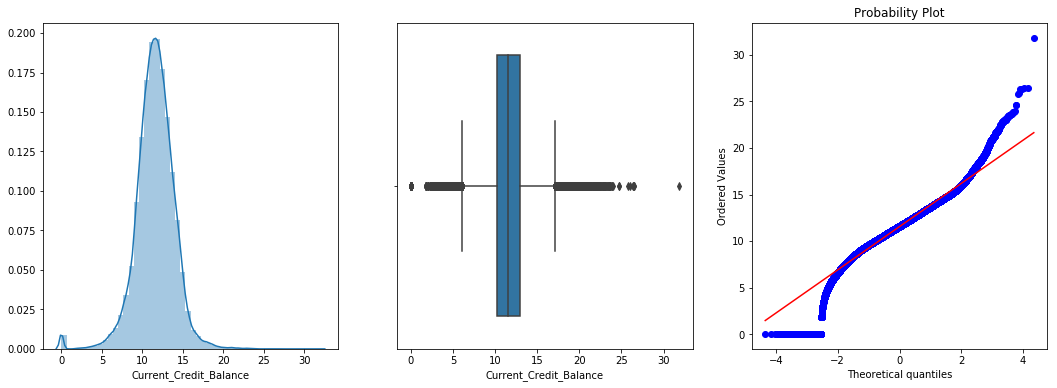

In [106]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.distplot(data['Current_Credit_Balance'])

plt.subplot(1,3,2)
sns.boxplot(data['Current_Credit_Balance'])

plt.subplot(1,3,3)
stats.probplot(data['Current_Credit_Balance'],dist="norm",plot=pylab)

plt.show()

The graphs shown above are the transformation of the graphs which shows a good distribution curve and also the skewness is removed which tells us that the outliers are handled 

## Maximum Open Credit

In [107]:
x = data[~pd.isnull(data['Maximum Open Credit'])]

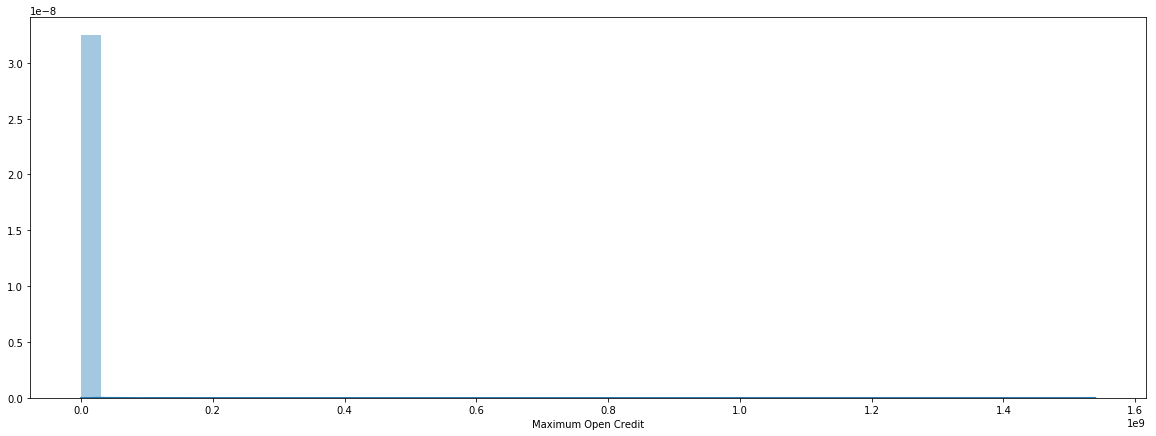

In [108]:
plt.figure(figsize=(20,7))
sns.distplot(x['Maximum Open Credit'])
plt.show()

Counldn't drew any conclusion from this graph so i went for the transformation of this distribution inorder to get some conclusions

In [109]:
x['Maximum_Open_Credit'] = x['Maximum Open Credit']**(1/5)

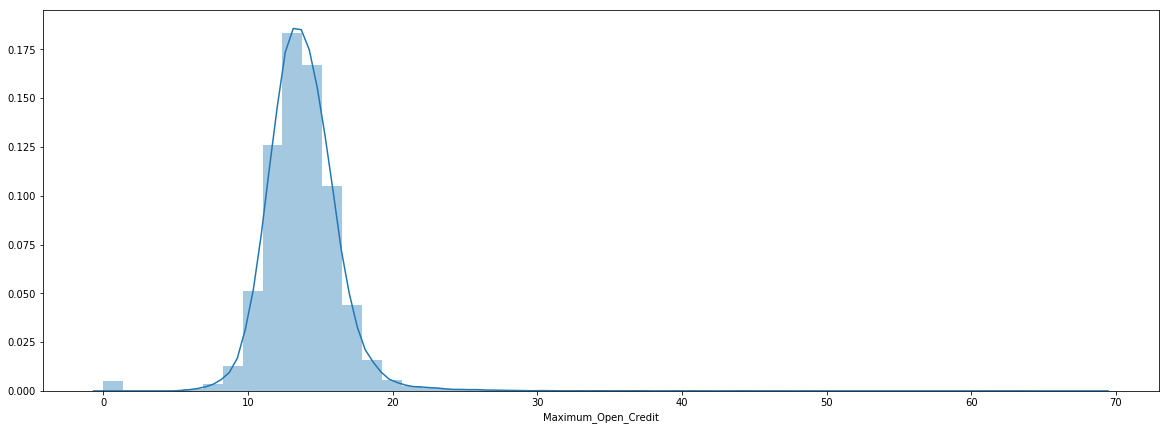

In [110]:
plt.figure(figsize=(20,7))
sns.distplot(x['Maximum_Open_Credit'])
plt.show()

The graph is right skewed and maximum of our customers have open credit ranging from 1,00,000 to 14,00,000

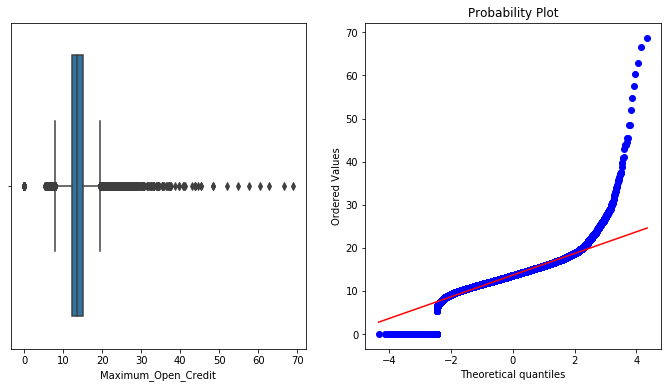

In [111]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,2)
sns.boxplot(x['Maximum_Open_Credit'])

plt.subplot(1,3,3)
stats.probplot(x['Maximum_Open_Credit'],dist="norm",plot=pylab)

plt.show()

In [112]:
upper_boundary,lower_boundary  = find_skewed_boundaries(x, 'Maximum_Open_Credit', 1.5)
print('Upper Boundary is ' + str(upper_boundary**5))
print()
print('Lower Boundary is ' + str(lower_boundary**5))
print()
print('Total no of customers : {}'.format(len(data)))
print()
print('Total no of customers with Current Credit Balance bigger than ' + str(int(upper_boundary**5)) + ' : {}'.format(
        len(x[x['Maximum_Open_Credit'] > upper_boundary])))
print()
print('% customers with Current Credit Balance bigger than ' + str(int(upper_boundary**5)) +' : {}'.format((
        len(x[x['Maximum_Open_Credit'] > upper_boundary]) / len(data))))
print()
print('Total no of customers with Current Credit Balance lower than ' + str(int(lower_boundary**5)) + ' : {}'.format(
        len(x[x['Maximum_Open_Credit'] < lower_boundary])))
print()
print('% customers with Current Credit Balance lower than ' + str(int(lower_boundary**5)) +' : {}'.format((
        len(x[x['Maximum_Open_Credit'] < lower_boundary]) / len(data))))

Upper Boundary is 2739027.973305722

Lower Boundary is 31420.685901831854

Total no of customers : 100000

Total no of customers with Current Credit Balance bigger than 2739027 : 1596

% customers with Current Credit Balance bigger than 2739027 : 0.01596

Total no of customers with Current Credit Balance lower than 31420 : 1097

% customers with Current Credit Balance lower than 31420 : 0.01097


# Categorical Columns
## Years in current job

In [113]:
x = data.groupby('Years in current job').agg({'Customer ID':'count'})
x.reset_index(inplace=True)
x.sort_values(by='Customer ID',inplace=True)

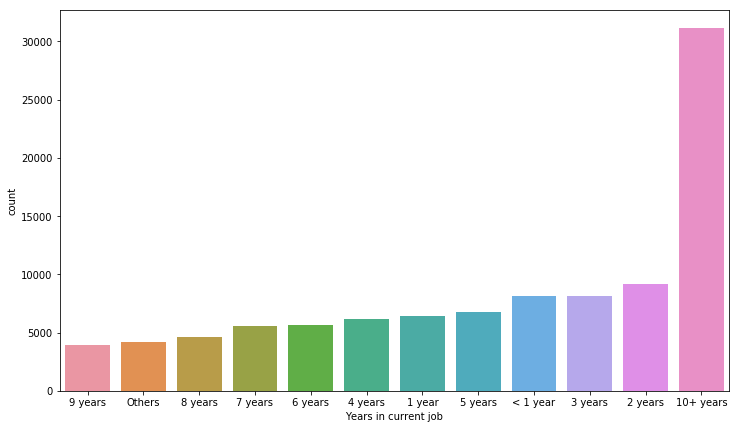

In [114]:
plt.figure(figsize=(12,7))
sns.countplot(x='Years in current job',data=data,order=x['Years in current job'])
plt.show()

The distribution graph of the categorical column years in current job is left skewed which tells us that majority of our customers who took loan from have mor than 10+ years of experience in there current job

In [115]:
data['Annual_Income'] = data['Annual Income']**(1/5)

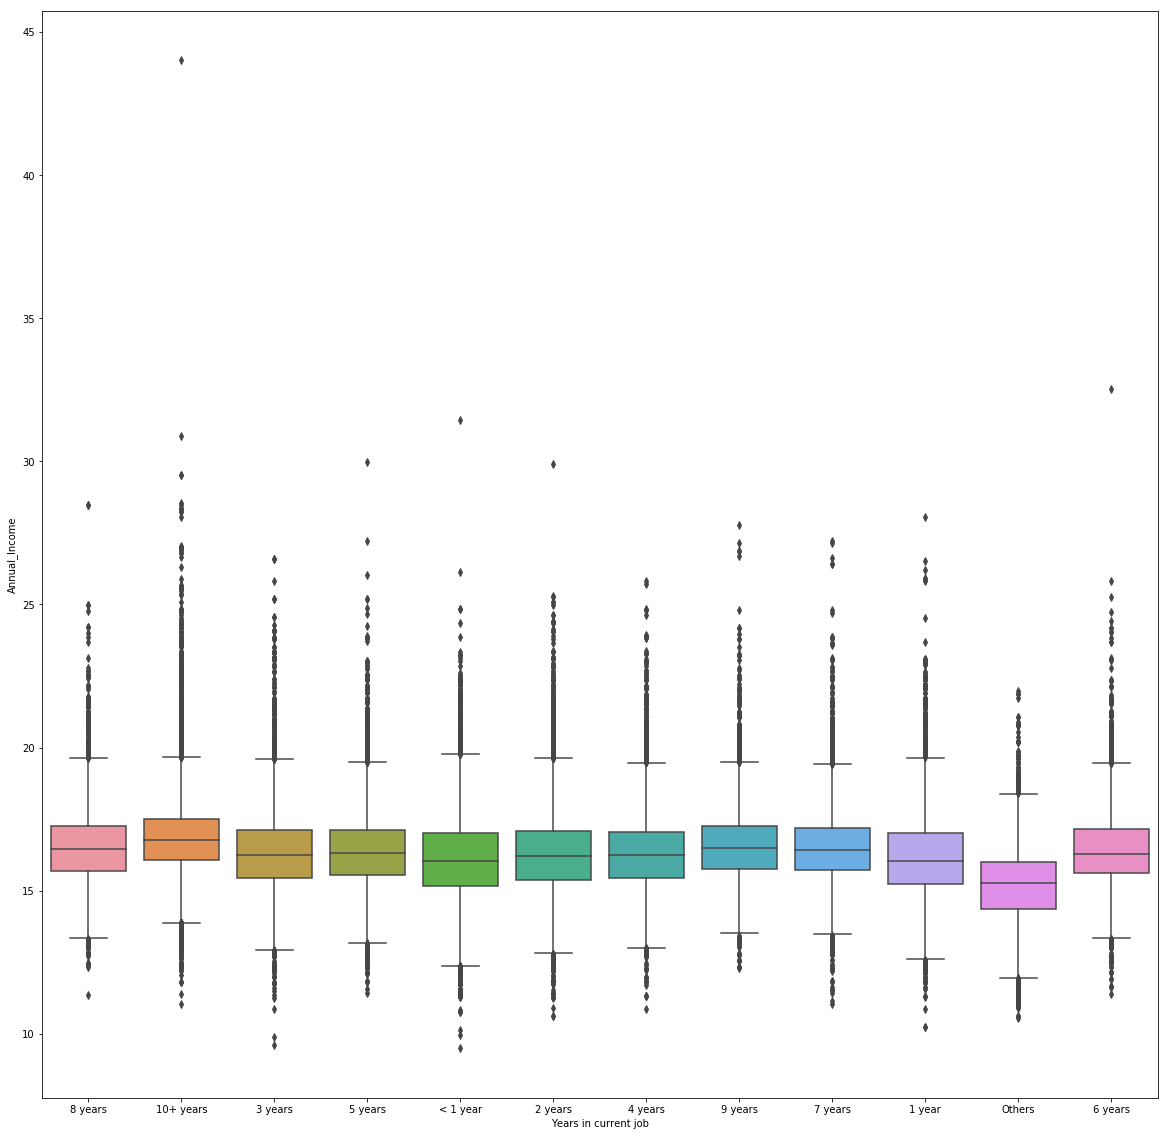

In [116]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Years in current job',y='Annual_Income',data=data)

In the above graph we can see that in each category there are outliers present for example there are people having only 3 years of experience and earing 32,00,000 PA and in the same category there are some people earning less than 2,00,000

In [117]:
32**5,12**5

(33554432, 248832)

# Home Ownership

In [118]:
x = data.groupby('Home Ownership').agg({'Customer ID':'count'})
x.reset_index(inplace=True)
x.sort_values(by='Customer ID',inplace=True)


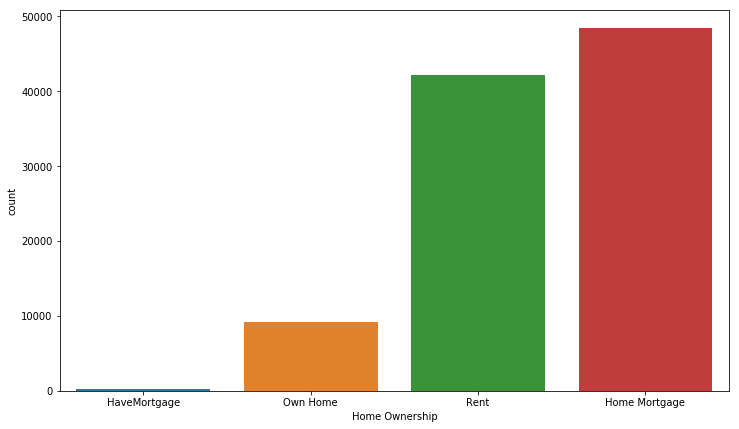

In [119]:
plt.figure(figsize=(12,7))
sns.countplot(x='Home Ownership',data=data,order=x['Home Ownership'])
plt.show()

In [120]:
data['Current_Loan_Amount'] = data['Current Loan Amount']**(1/5)

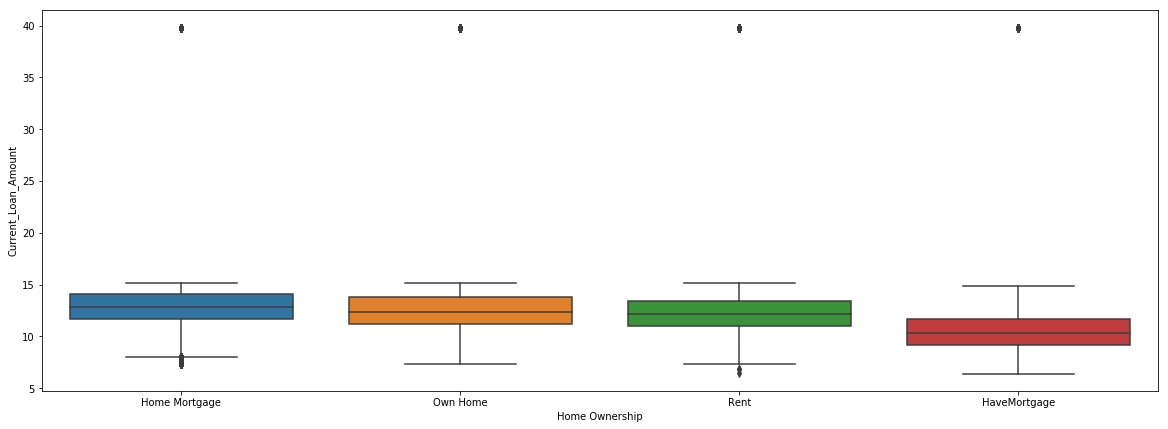

In [134]:
plt.figure(figsize=(20,7))
sns.boxplot(x='Home Ownership',y='Current_Loan_Amount',data=data)

This graph also tells us about the outlier's present in each category of home Owernership wrt current Loan amount

## Purpose

In [122]:
x = data.groupby('Purpose').agg({'Customer ID':'count'})
x.reset_index(inplace=True)
x.sort_values(by='Customer ID',inplace=True)

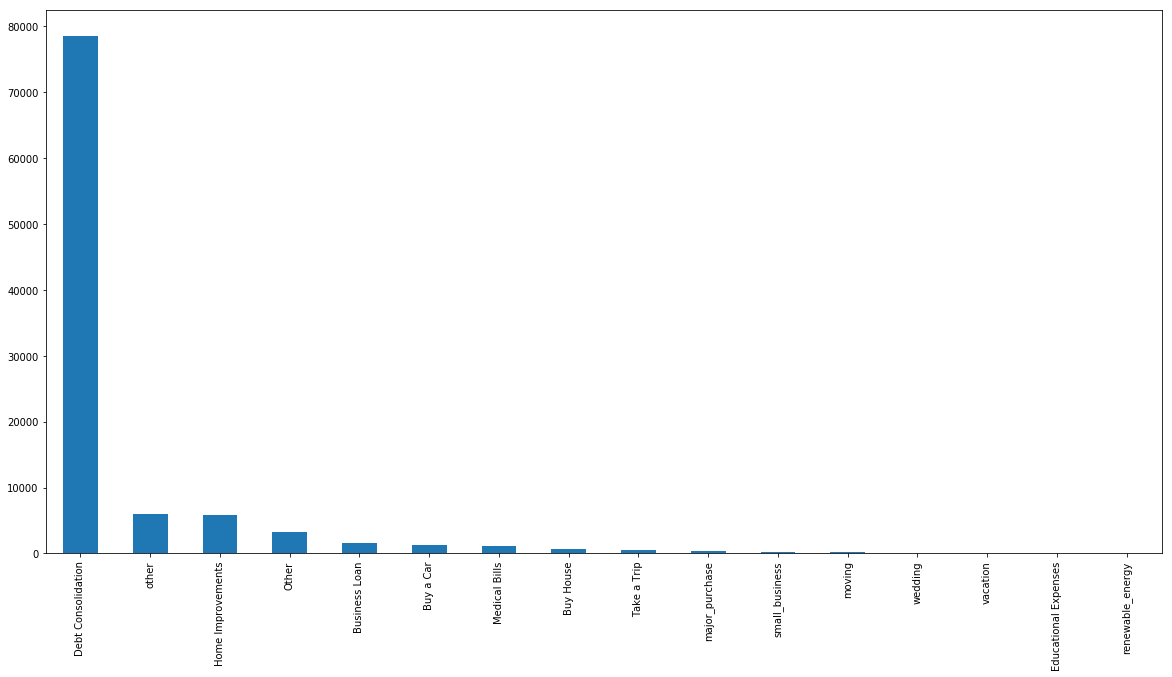

In [123]:
plt.figure(figsize=(20,10))
data['Purpose'].value_counts().plot(kind='bar')
plt.show()

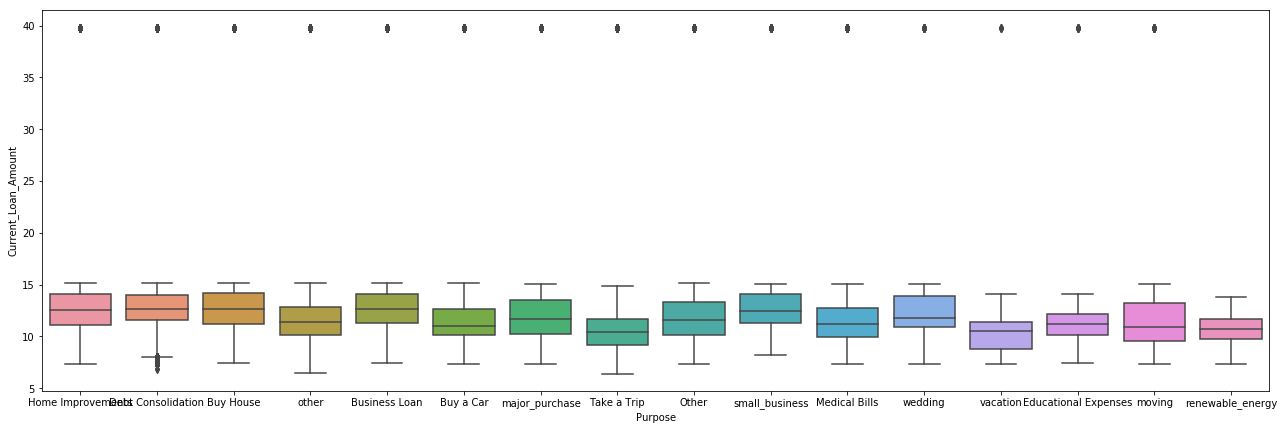

In [124]:
plt.figure(figsize=(22,7))
sns.boxplot(x='Purpose',y='Current_Loan_Amount',data=data)
plt.show()

This graph also shows us the outliers present in each category wrt to the loan ammount taken 

In [135]:
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                       0
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
Number_of_Open_Accounts             0
Current_Credit_Balance              0
Annual_Income                       0
Current_Loan_Amount                 0
Monthly_Debt                        0
Years_of_Credit_History             0
dtype: int64

In [136]:
data.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Number_of_Open_Accounts,Current_Credit_Balance,Annual_Income,Current_Loan_Amount,Monthly_Debt,Years_of_Credit_History
Current Loan Amount,1.00,-0.10,0.03,-0.01,0.02,0.01,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.03,0.99,-0.01,0.02
Credit Score,-0.10,1.00,-0.02,-0.00,-0.01,-0.00,0.01,-0.00,-0.00,-0.00,-0.01,0.01,0.01,0.01,-0.04,-0.09,0.00,-0.01
Annual Income,0.03,-0.02,1.00,0.44,0.15,-0.07,0.13,-0.01,0.29,0.04,-0.04,0.04,0.14,0.24,0.79,0.07,0.36,0.16
Monthly Debt,-0.01,-0.00,0.44,1.00,0.20,-0.06,0.41,-0.06,0.48,0.04,-0.08,0.02,0.43,0.50,0.56,0.06,0.90,0.22
Years of Credit History,0.02,-0.01,0.15,0.20,1.00,-0.04,0.13,0.06,0.21,0.03,0.07,0.02,0.14,0.23,0.21,0.04,0.18,0.98
Months since last delinquent,0.01,-0.00,-0.07,-0.06,-0.04,1.00,-0.03,0.10,-0.03,-0.01,0.12,0.01,-0.03,-0.00,-0.08,0.01,-0.05,-0.04
Number of Open Accounts,0.00,0.01,0.13,0.41,0.13,-0.03,1.00,-0.01,0.23,0.03,-0.02,0.01,0.99,0.34,0.21,0.03,0.43,0.14
Number of Credit Problems,-0.00,-0.00,-0.01,-0.06,0.06,0.10,-0.01,1.00,-0.11,-0.01,0.75,0.58,-0.01,-0.15,-0.02,-0.01,-0.05,0.07
Current Credit Balance,0.00,-0.00,0.29,0.48,0.21,-0.03,0.23,-0.11,1.00,0.14,-0.12,-0.02,0.23,0.72,0.33,0.05,0.41,0.22
Maximum Open Credit,-0.00,-0.00,0.04,0.04,0.03,-0.01,0.03,-0.01,0.14,1.00,-0.01,-0.00,0.03,0.09,0.04,0.00,0.03,0.03
